In [3]:
#cau1
import pandas as pd 
import seaborn as sns

def load_data():
    """
    Load Titanic dataset from seaborn
    Returns:
        DataFrame: Titanic dataset
    """
    df = sns.load_dataset("titanic")
    return df

df = load_data()
df.head(10)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


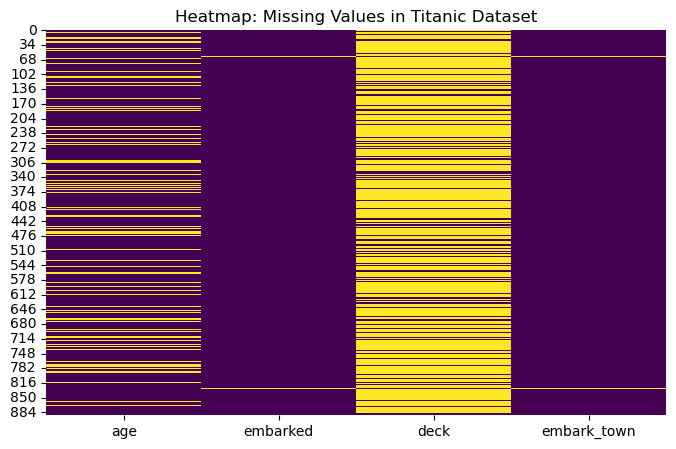

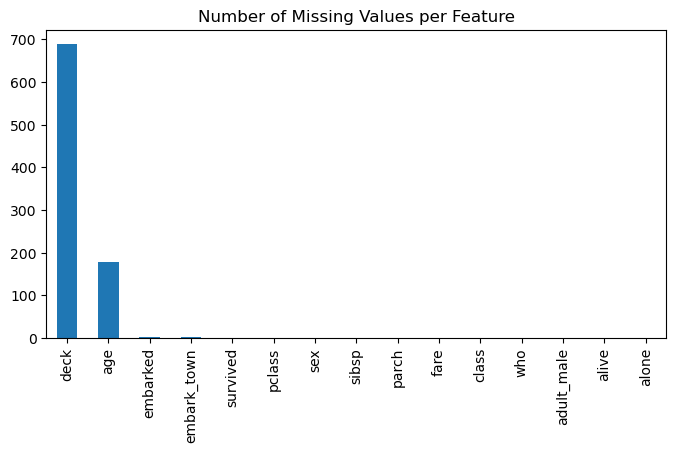

Thống kê dữ liệu thiếu:
             Missing Values  Percentage (%)
age                     177       19.865320
embarked                  2        0.224467
deck                    688       77.216611
embark_town               2        0.224467


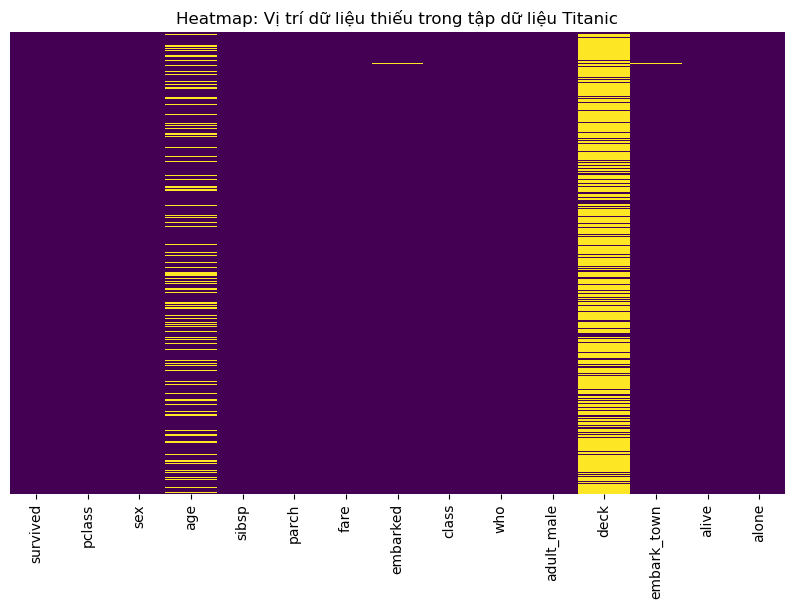

In [9]:
#cau 2
import matplotlib.pyplot as plt 

missing_cols = df.columns[df.isnull().any()]

plt.figure(figsize=(8,5))
sns.heatmap(df[missing_cols].isnull(), 
            cbar=False, 
            cmap='viridis')
plt.title("Heatmap: Missing Values in Titanic Dataset")
plt.show()
df.isnull().sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,4),
    title='Number of Missing Values per Feature'
)
plt.show()

analyze_missing_data(df)
# Age: thiếu khá nhiều (~20%) → cần xử lý cẩn thận

# Cabin: thiếu rất nhiều (>75%) → không thể loại bỏ, nên biến đổi

# Embarked: thiếu rất ít → có thể thay thế bằng giá trị phổ biến nhất


In [20]:
#cau 3
df = pd.read_csv("D:/thinh/DuLieu/titanic_disaster.csv")
df.columns

df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)

df['firstName'] = df['firstName'].str.strip()
df['secondName'] = df['secondName'].str.strip()

df.drop(columns=['Name'], inplace=True)

df[['firstName', 'secondName']].head()



,firstName,secondName
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


In [21]:
#cau4
df['Sex'].value_counts()
df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})
df['Sex'].value_counts()


Sex
M    577
F    314
Name: count, dtype: int64

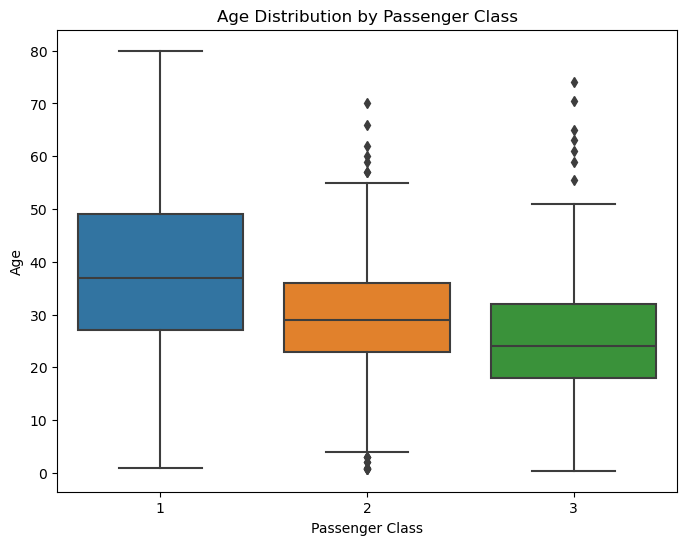

In [22]:
#cau 5a
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()


In [27]:
#cau 5b
df['Age'].isnull().sum()
df['Age'] = df.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.mean())
)
df['Age'].isnull().sum()
df[['Pclass', 'Age']].head(10)




,Pclass,Age
0,3,22.00000
1,1,38.00000
2,3,26.00000
3,1,35.00000
4,3,35.00000
5,3,25.14062
6,1,54.00000
7,3,2.00000
8,3,27.00000
9,2,14.00000


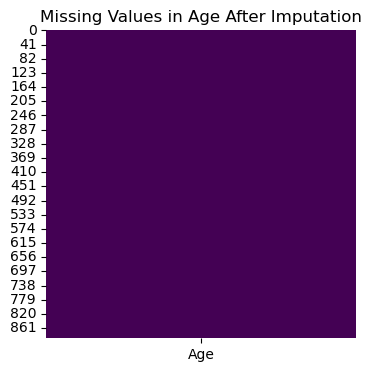

In [25]:
#cau 5b
plt.figure(figsize=(4,4))
sns.heatmap(df[['Age']].isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Age After Imputation")
plt.show()

In [30]:
#cau 6
bins = [0, 12, 18, 60, 120]
labels = ['Kid', 'Teen', 'Adult', 'Older']

df['Agegroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df[['Age', 'Agegroup']].head(10)
df['Agegroup'].value_counts()


Agegroup
Adult    730
Teen      70
Kid       69
Older     22
Name: count, dtype: int64

In [31]:
#cau 7
df['namePrefix'] = df['secondName'].str.extract(
    r'(Mr|Mrs|Miss|Master)', expand=False
)
df[['secondName', 'namePrefix']].head(10)
df['namePrefix'].value_counts()


namePrefix
Mr        645
Miss      182
Master     40
Name: count, dtype: int64

In [33]:
#cau 8 
df['familySize'] = 1 + df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'familySize']].head(10)
df['familySize'].value_counts().sort_index()


familySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

In [34]:
#cau 9
df['Alone'] = (df['familySize'] == 1).astype(int)
df[['familySize', 'Alone']].head(10)
df['Alone'].value_counts()


Alone
1    537
0    354
Name: count, dtype: int64

In [39]:
#cau 10
df['Cabin'].isnull().sum()
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['typeCabin'] = df['Cabin'].str[0]
df[['Cabin', 'typeCabin']].head(10)




,Cabin,typeCabin
0,Unknown,U
1,C85,C
2,Unknown,U
3,C123,C
4,Unknown,U
5,Unknown,U
6,E46,E
7,Unknown,U
8,Unknown,U
9,Unknown,U


In [40]:
df['typeCabin'].value_counts()

typeCabin
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64